>#### 📥 Importing Libraries and Loading Dataset

In [172]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:/python for data science/courier_project/delivery_data.csv')

In [174]:
df.head()

,Traffic_Level,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,Distance (km)
0,High,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,9.89
1,High,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,19.11
2,High,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,11.59
3,High,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,21.93
4,High,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,18.26


#### 📊 Displaying Dataset Information
**Dataset Overview:**
>The dataset has 10,000 delivery records with 14 features, covering delivery details, personnel demographics, locations, environmental conditions, and distances. Some columns, including traffic level, weather, and distance, contain missing values.

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   Delivery_person_ID           10000 non-null  object 
 2   weather_description          9995 non-null   object 
 3   Type_of_order                10000 non-null  object 
 4   Type_of_vehicle              10000 non-null  object 
 5   Delivery_person_Age          10000 non-null  int64  
 6   Delivery_person_Ratings      10000 non-null  float64
 7   Restaurant_latitude          10000 non-null  object 
 8   Restaurant_longitude         10000 non-null  object 
 9   Delivery_location_latitude   10000 non-null  object 
 10  Delivery_location_longitude  10000 non-null  object 
 11  temperature                  9995 non-null   float64
 12  humidity                     9995 non-null   float64
 13  Distance (km)    

>**Instead of dropping missing values, we use imputation techniques to retain dataset size and improve data quality for analysis and modeling.**

#### 🛠️ Filling Missing the Values with Median and Mode
>**The missing values in categorical columns ``Traffic_Level`` and ``weather_description`` are imputed using the mode, replacing them with the most frequent values in the dataset.**

In [176]:
df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0],inplace=True)

In [ ]:
df['weather_description'].fillna(df['weather_description'].mode()[0],inplace=True)

>**The `temperature`, `humidity` and `Distance` are numerical columns, so missing values are filled with the median instead of the mean, because the mean can be distorted by extreme values (outliers).**

In [178]:
df['temperature'].fillna(df['temperature'].median(),inplace=True)

In [179]:
df['humidity'].fillna(df['humidity'].median(),inplace=True)

In [180]:
df['Distance (km)'].fillna(df['Distance (km)'].median(),inplace=True)

>**All missing values in both categorical and numerical columns have been imputed, so the dataset is now complete with no missing values remaining.**


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   weather_description          10000 non-null  object 
 3   Type_of_order                10000 non-null  object 
 4   Type_of_vehicle              10000 non-null  object 
 5   Delivery_person_Age          10000 non-null  int64  
 6   Delivery_person_Ratings      10000 non-null  float64
 7   Restaurant_latitude          10000 non-null  object 
 8   Restaurant_longitude         10000 non-null  object 
 9   Delivery_location_latitude   10000 non-null  object 
 10  Delivery_location_longitude  10000 non-null  object 
 11  temperature                  10000 non-null  float64
 12  humidity                     10000 non-null  float64
 13  Distance (km)    

>#### 📑 **Counting Duplicate Rows in Dataset**

In [183]:
df.duplicated().sum()

np.int64(4)

>#### 🧹 Removing Duplicate Rows from Dataset

In [184]:
df.drop_duplicates(inplace=True)

In [185]:
df.duplicated().sum()

np.int64(0)

>**We will rename the columns to shorter and cleaner versions, making them easier to read, write, and interpret while reducing errors during analysis.**

In [188]:
df = df.rename(columns={
    "Traffic_Level": "traffic",
    "ID": "id",
    "Delivery_person_ID": "driver_id",
    "weather_description": "weather",
    "Type_of_order": "order_type",
    "Type_of_vehicle": "vehicle_type",
    "Delivery_person_Age": "driver_age",
    "Delivery_person_Ratings": "driver_rating",
    "Restaurant_latitude": "rest_lat",
    "Restaurant_longitude": "rest_lon",
    "Delivery_location_latitude": "dest_lat",
    "Delivery_location_longitude": "dest_lon",
    "temperature": "temp",
    "humidity": "humidity",
    "Distance (km)": "distance"
})


>#### **Here are the all new column names**

In [190]:
df.columns

Index(['traffic', 'driver_id', 'weather', 'order_type', 'vehicle_type',
       'driver_age', 'driver_rating', 'rest_lat', 'rest_lon', 'dest_lat',
       'dest_lon', 'temp', 'humidity', 'distance'],
      dtype='object')

>**We standardize the weather column by grouping similar descriptions into broader categories, reducing redundancy, simplifying analysis, and ensuring consistency for easier interpretation and modeling.**

In [192]:
mapping = {
    "clear sky": "Clear",
    "few clouds": "Partly Cloudy",
    "scattered clouds": "Partly Cloudy",
    "broken clouds": "Cloudy",
    "overcast clouds": "Cloudy",
    "haze": "Foggy",
    "mist": "Foggy",
    "fog": "Foggy",
    "smoke": "Foggy",
    "light rain": "Rain",
    "moderate rain": "Rain"
}

df['weather'] = df['weather'].replace(mapping)


>**This shows the frequency of each unique category in the weather column, helping us understand the distribution of weather conditions and identify the most and least common categories.**

In [193]:
df['weather'].value_counts()

weather
Foggy            4707
Clear            3264
Cloudy           1026
Rain              537
Partly Cloudy     462
Name: count, dtype: int64

>**We simplify and standardize the vehicle_type column by merging similar categories into broader groups. This reduces fragmentation, improves clarity, and ensures more consistent, analyzable data..**

In [194]:
mapping = {
    "motorcycle": "Bike",
    "scooter": "Bike",        # merged into Motorcycle
    "electric_scooter": "E-Bike",
    "bicycle": "Bicycle"
}

df['vehicle_type'] = df['vehicle_type'].replace(mapping)


>**This displays the count of each vehicle type after standardization, showing their frequency distribution and highlighting which vehicle categories are most and least common in deliveries.**

In [195]:
df['vehicle_type'].value_counts()

vehicle_type
Bike       9163
E-Bike      813
Bicycle      20
Name: count, dtype: int64

#### Data Preprocessing Observations

>**From the descriptive statistics, several irregularities and potential outliers were identified:**

1. Driver Age: Minimum = 15 (below legal driving age), Maximum = 50 (unusually high). → These records will be removed.
2. Driver Rating: Maximum = 6, exceeding the valid 1–5 range. → To be corrected.
3. Humidity: Maximum = 94%, which is high but realistic. → Retained.
4. Distance: Maximum = 59.84 km, much higher than typical values. → To be investigated and treated as an outlier.

In [196]:
df.describe()

,driver_age,driver_rating,temp,humidity,distance
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,29.522809,4.629332,22.937968,66.164066,14.213292
std,5.701248,0.322989,3.378792,15.601442,7.986090
min,15.000000,1.000000,6.770000,27.000000,1.550000
25%,25.000000,4.500000,20.140000,54.000000,8.210000
50%,29.000000,4.700000,23.000000,67.000000,13.400000
75%,34.000000,4.800000,25.980000,81.000000,18.860000
max,50.000000,6.000000,29.050000,94.000000,59.840000


>**We will remove the unrealistic driver age values (15 and 50) from the dataset**

In [197]:
df = df[~df['driver_age'].isin([50, 15])]

>**After filtering out unrealistic driver ages (15 and 50), the invalid rating of 6 is also removed since it was tied to those records, leaving only valid ratings within the 1–5 range.**

In [198]:
df.describe()

,driver_age,driver_rating,temp,humidity,distance
count,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000
mean,29.509568,4.629777,22.938552,66.166516,14.211760
std,5.659248,0.309834,3.379503,15.594136,7.988873
min,20.000000,2.500000,6.770000,27.000000,1.550000
25%,25.000000,4.500000,20.140000,54.000000,8.210000
50%,29.000000,4.700000,23.000000,67.000000,13.400000
75%,34.000000,4.800000,25.980000,81.000000,18.860000
max,39.000000,5.000000,29.050000,94.000000,59.840000


#### We will create a bar plot and a box plot for the distance column to visually inspect for outliers.
>**The box plot will clearly show the distribution, median, quartiles, and extreme values, helping to identify outliers that may skew the analysis.**

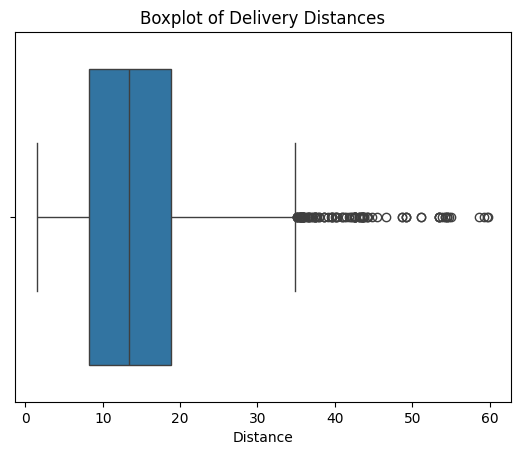

In [199]:
sns.boxplot(x=df['distance'])
plt.title('Boxplot of Delivery Distances')
plt.xlabel('Distance')
plt.show()

>**The bar plot will show the frequency of deliveries at different distance ranges, helping identify unusually high or low values.**
>**These visualizations will guide us in deciding whether any extreme distance values need to be treated or removed.**

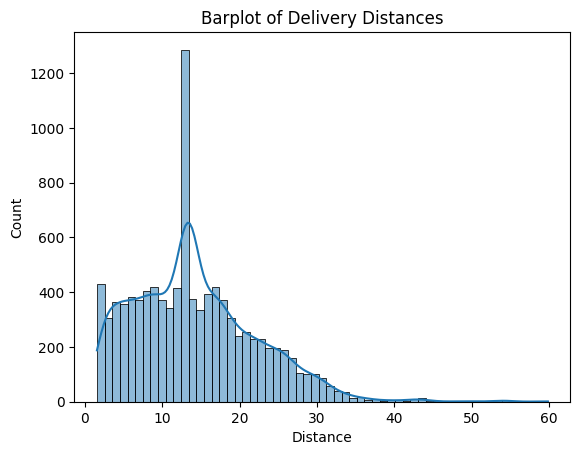

In [200]:
sns.histplot(df['distance'], kde=True)
plt.title('Barplot of Delivery Distances')
plt.xlabel('Distance')
plt.show()

**We calculate outlier thresholds for the distance column using the 3-sigma rule:**
1. **Upper bound: mean + 3 × standard deviation**
2. **Lower bound: mean − 3 × standard deviation**

>**Any values outside this range are flagged as outliers, helping detect unusually high or low delivery distances that could distort analysis.**

In [ ]:
upper_limit=df['distance'].mean() + 3*df['distance'].std()
lower_limit=df['distance'].mean() - 3*df['distance'].std()
upper_limit, lower_limit


(np.float64(38.17837876717937), np.float64(-9.754858077869674))

>**We select all rows where the delivery distance falls outside the 3-sigma limits (greater than the upper bound or less than the lower bound). This isolates unusually high or low distances for further review or treatment.**

In [202]:
df.loc[(df['distance']> upper_limit) | (df['distance']< lower_limit)]

,traffic,driver_id,weather,order_type,vehicle_type,driver_age,driver_rating,rest_lat,rest_lon,dest_lat,dest_lon,temp,humidity,distance
2556,High,LUDHRES16DEL03,Clear,Snack,Bike,39,4.9,30.895.817,75.813.112,31.035.817,75.953.112,22.54,41.0,40.98
7625,Very High,MUMRES14DEL02,Clear,Meal,Bike,23,4.8,191.813,72.836.191,193.113,72.966.191,27.05,49.0,42.54
7703,Very High,DEHRES07DEL02,Clear,Buffet,Bike,37,4.7,30.362.686,7.806.889,30.492.686,7.819.889,12.01,81.0,54.27
7706,Very High,HYDRES04DEL02,Cloudy,Meal,Bike,33,4.8,17.411.028,78.329.645,17.541.028,78.459.645,21.20,67.0,53.49
7729,Very High,DEHRES08DEL03,Clear,Buffet,Bike,36,4.8,30.359.722,78.067.079,30.499.722,78.207.079,9.18,82.0,59.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,Very High,MUMRES05DEL02,Foggy,Drinks,Bike,29,4.6,18.927.584,72.832.585,18.977.584,72.882.585,28.05,57.0,49.15
9288,Very High,JAPRES07DEL03,Foggy,Meal,Bike,24,4.6,26.766.536,75.837.333,26.906.536,75.977.333,24.07,46.0,38.54
9291,Very High,MUMRES04DEL02,Clear,Meal,Bike,24,4.5,19.254.567,72.848.923,19.384.567,72.978.923,27.71,58.0,51.16
9322,Very High,MUMRES13DEL02,Clear,Buffet,Bike,31,3.9,19.178.321,72.834.715,19.308.321,72.964.715,28.04,53.0,42.60


#### Method 1: Z-Score Method

>**Using the 3-sigma (Z-score) rule, outliers in the distance column are identified as values lying more than three standard deviations away from the mean. These records are removed, keeping only values within a reasonable range and ensuring cleaner data for analysis.**

In [203]:
new_df = df.loc[(df['distance']<= upper_limit) & (df['distance']>= lower_limit)]
print(f'Before removing outliers:{df.shape[0]}')
print(f'After removing outliers:{new_df.shape[0]}')
print(f'Outliers removed:{df.shape[0]-new_df.shape[0]}')

Before removing outliers:9981
After removing outliers:9912
Outliers removed:69


#### Method 2: Capping the Outliers
>**In this approach, outliers are capped instead of removed. Values above the upper limit are replaced with the upper bound, and those below the lower limit are replaced with the lower bound. This preserves the dataset size while minimizing the influence of extreme values.**

In [204]:
new_df=df.copy()
new_df.loc[(new_df['distance']>upper_limit),'distance']= upper_limit
new_df.loc[(new_df['distance']<lower_limit),'distance']= lower_limit

>**We will proceed with Method 2 (Capping Outliers), which adjusts extreme values instead of removing them. This keeps the dataset intact, preserves its shape, and reduces the impact of outliers on analysis.**

In [205]:
new_df['distance'].shape[0]

9981

>**After capping the outliers, we plot a boxplot of the `distance` column to visually verify that extreme values have been adjusted and the distribution appears more balanced.**

<Axes: xlabel='distance'>

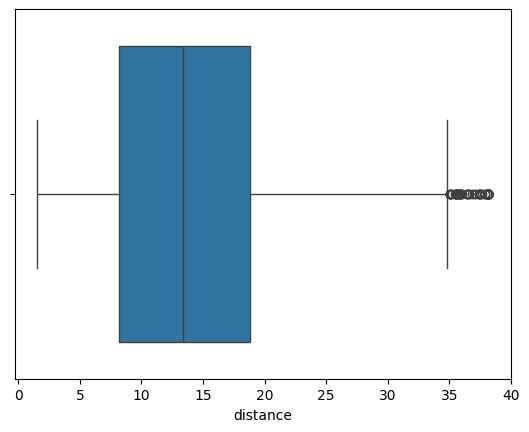

In [206]:
sns.boxplot(x=new_df['distance'])

>**The final dataset statistics appear cleaner and more consistent after treating outliers and removing invalid values, ensuring the data is now more reliable for analysis.**

In [207]:
new_df.describe()

,driver_age,driver_rating,temp,humidity,distance
count,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000
mean,29.509568,4.629777,22.938552,66.166516,14.157725
std,5.659248,0.309834,3.379503,15.594136,7.782061
min,20.000000,2.500000,6.770000,27.000000,1.550000
25%,25.000000,4.500000,20.140000,54.000000,8.210000
50%,29.000000,4.700000,23.000000,67.000000,13.400000
75%,34.000000,4.800000,25.980000,81.000000,18.860000
max,39.000000,5.000000,29.050000,94.000000,38.178379


>#### 💾 Exporting Cleaned Data to CSV File

In [208]:
# save the dataframe in to csv
new_df.to_csv('D:/python for data science/courier_project/cleaned_data.csv', index=False)

>#### 🔗 Importing CSV Data into MySQL Database with Table Creation and Insertion

In [209]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('cleaned_data.csv', 'courier_data'),
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='jamali,786',
    database='delivery_db'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:/python for data science/courier_project'

def get_sql_type(dtype):
    """Map pandas data types to SQL data types."""
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Specify encoding

        # Replace NaN with None to handle SQL NULL
        df = df.where(pd.notnull(df), None)

        # Debugging: Check for NaN values
        print(f"Processing {csv_file}")
        print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

        # Clean column names
        df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

        # Generate the CREATE TABLE statement with appropriate data types
        columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
        create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
        
        cursor.execute(create_table_query)

        # Insert DataFrame data into the MySQL table
        for _, row in df.iterrows():
            # Convert row to tuple and handle NaN/None explicitly
            values = tuple(None if pd.isna(x) else x for x in row)
            sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
            cursor.execute(sql, values)

        # Commit the transaction for the current CSV file
        conn.commit()

    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        conn.rollback()  # Rollback in case of error

# Close the cursor and connection
cursor.close()
conn.close()

Processing cleaned_data.csv
NaN values before replacement:
traffic          0
driver_id        0
weather          0
order_type       0
vehicle_type     0
driver_age       0
driver_rating    0
rest_lat         0
rest_lon         0
dest_lat         0
dest_lon         0
temp             0
humidity         0
distance         0
dtype: int64



#### Final Data Preprocessing Report
1. **Dataset Overview**
   1. 10,000 delivery records with 14 columns.
   2. Covers delivery conditions, personnel details, environmental factors, and location info.
   3. Missing values found in Traffic_Level, weather, temperature, humidity, and distance.
   4. Some columns required data type corrections.

2. **Handling Missing Values**
    1. Traffic_Level (categorical): Imputed with mode (most frequent value).
    2. Temperature (numerical): Imputed with median (robust against outliers).
    3. Humidity & Weather: Minor missing values filled appropriately.
    4. Distance (km): Missing values imputed to maintain dataset completeness.
    5. ✅ No missing values remained after imputation.

3.  **Renaming Columns**
    1. Simplified column names for readability and reduced errors.

4.  **Data Standardization**
    1. Weather: Merged similar labels (e.g., few clouds → Partly Cloudy).
    2.  Vehicle Type: Grouped related categories (e.g., motorcycle & scooter → Bike).

5.  **Descriptive Statistics & Data Validation**
    1. Initial statistics highlighted irregularities:
    2. Driver Age: Minimum = 15 (illegal age), Maximum = 50 (too high).
    3. Driver Rating: Maximum = 6 (should be within 1–5).
    4. Humidity: Maximum = 94, high but valid.
    5. Distance: Maximum = 59.84 km, identified as an outlier.

6.  **Cleaning Invalid Values**
    1. Removed unrealistic driver ages (15 and 50)
    2. Invalid rating of 6 was linked to these records and removed automatically.

7. **Outlier Detection & Treatment in Distance**
    1. **Method 1: Z-Score (3-Sigma Rule):** Detected extreme values; removal reduced dataset size.
    2. **Method 2: Capping (Chosen):** Replaced values beyond limits with upper/lower bounds.
    3. ✅ **Decision:** Adopted Method 2 (Capping) to retain all records while controlling distortion.

8. **Visualization**
   1. Bar Plot & Box Plot used before and after treatment.
   2. Post-capping boxplot confirmed outliers were properly adjusted.

9.  **Final Statistics**
    1. Dataset is now free of missing values, unrealistic ages, invalid ratings, and extreme distances.
    2. Cleaner, more consistent, and well-prepared for analysis and modeling.